In [1]:
library(statsr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data(nycflights)

In [6]:
str(nycflights)

tibble [32,735 × 16] (S3: tbl_df/data.frame)
 $ year     : int [1:32735] 2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int [1:32735] 6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int [1:32735] 30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int [1:32735] 940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num [1:32735] 15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int [1:32735] 1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num [1:32735] -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr [1:32735] "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr [1:32735] "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int [1:32735] 407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr [1:32735] "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr [1:32735] "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num [1:32735] 313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num [1:32735] 2475 1598 2475 1005 296 ...
 $ hour     : num [1:32735] 9 16 8 18 1

#### Some interesting functions

filter()
arrange()
select()
distinct()
mutate()
summarise()
sample_n()


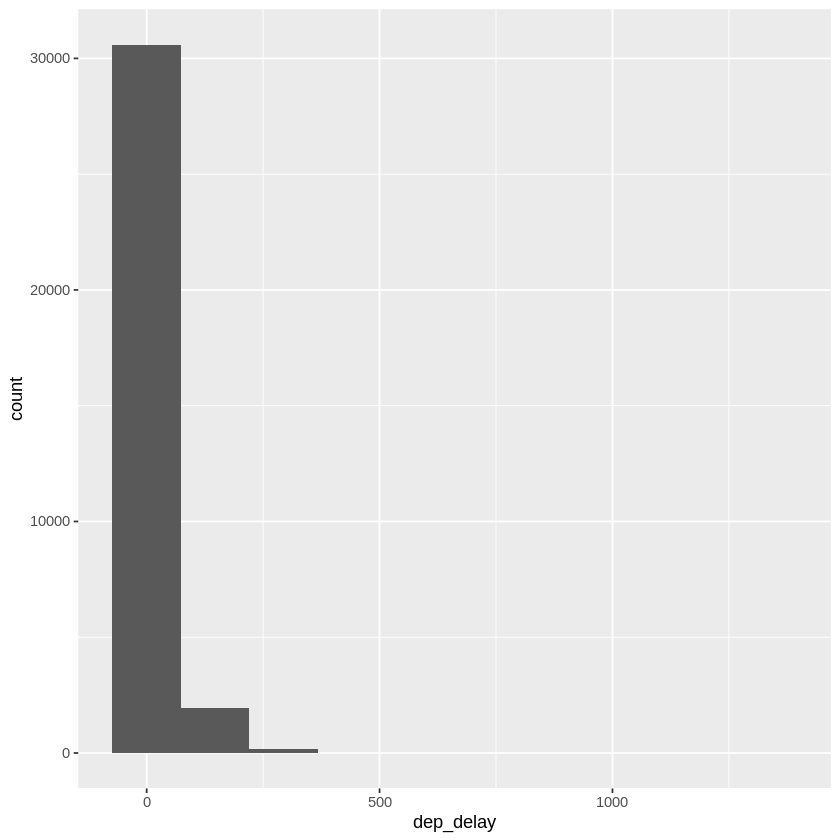

In [11]:
ggplot(data = nycflights, aes(x = dep_delay)) + geom_histogram(bins=10)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



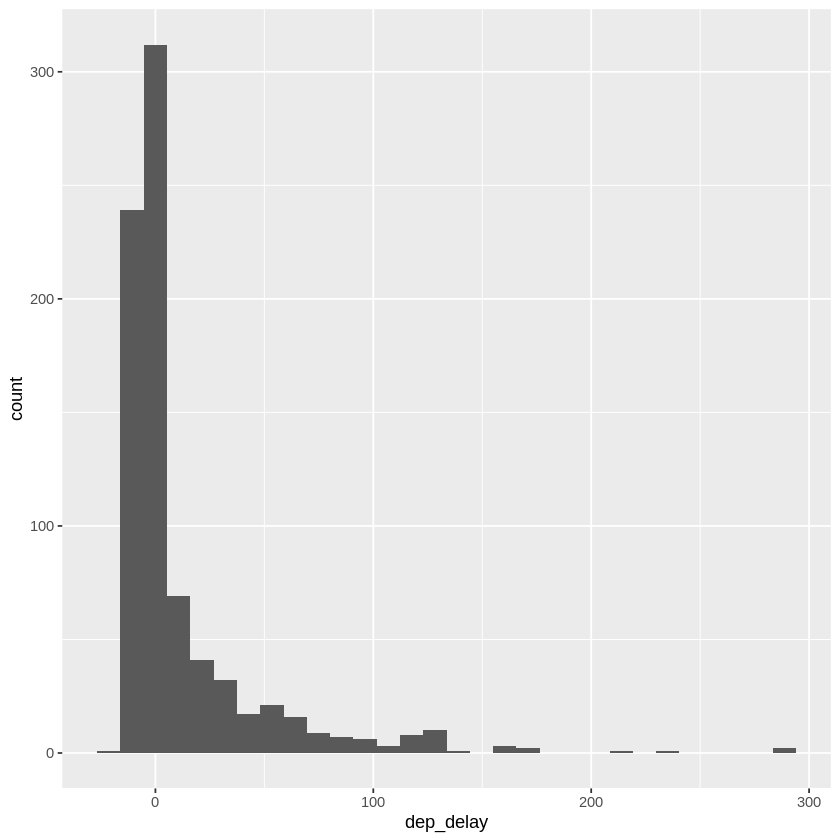

In [12]:
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

In [13]:
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
<dbl>,<dbl>,<int>
11.69913,35.55567,801


mean
median
sd
var
IQR
range
min
max

In [17]:
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



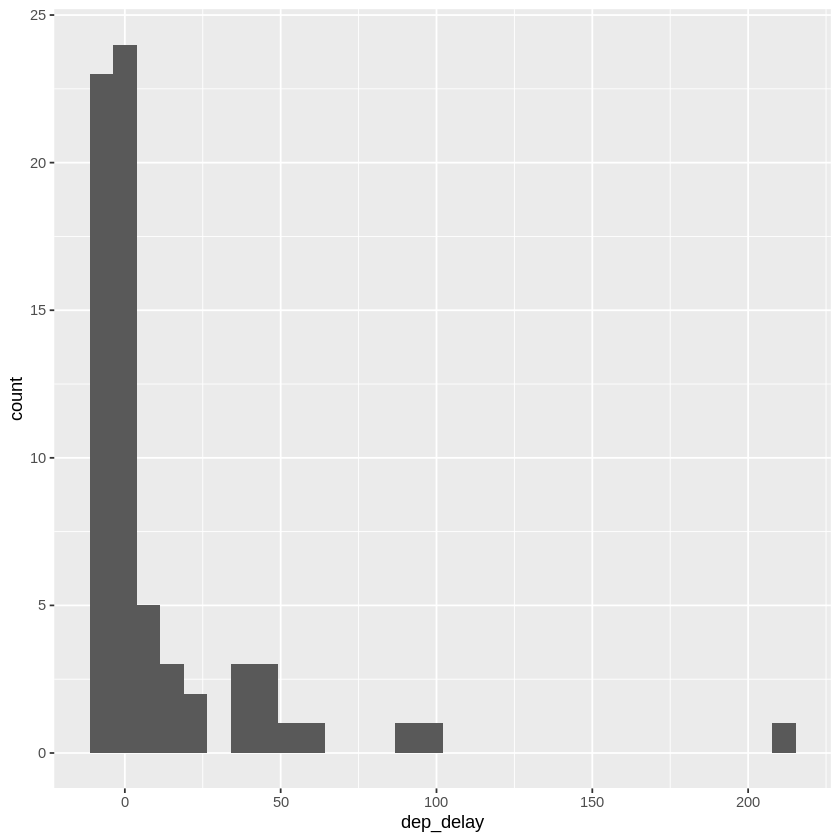

In [18]:
ggplot(data = sfo_feb_flights, aes(x = dep_delay)) +
  geom_histogram()

In [19]:
rdu_flights %>%
  group_by(origin) %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

`summarise()` ungrouping output (override with `.groups` argument)



origin,mean_dd,sd_dd,n
<chr>,<dbl>,<dbl>,<int>
EWR,13.365517,32.08492,145
JFK,15.396667,40.30535,300
LGA,7.904494,32.18620,356


In [20]:
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))

`summarise()` ungrouping output (override with `.groups` argument)



month,mean_dd
<int>,<dbl>
7,20.754559
6,20.350293
12,17.368189
4,14.554477
3,13.517602
5,13.264800
8,12.619097
2,10.687227
1,10.233333


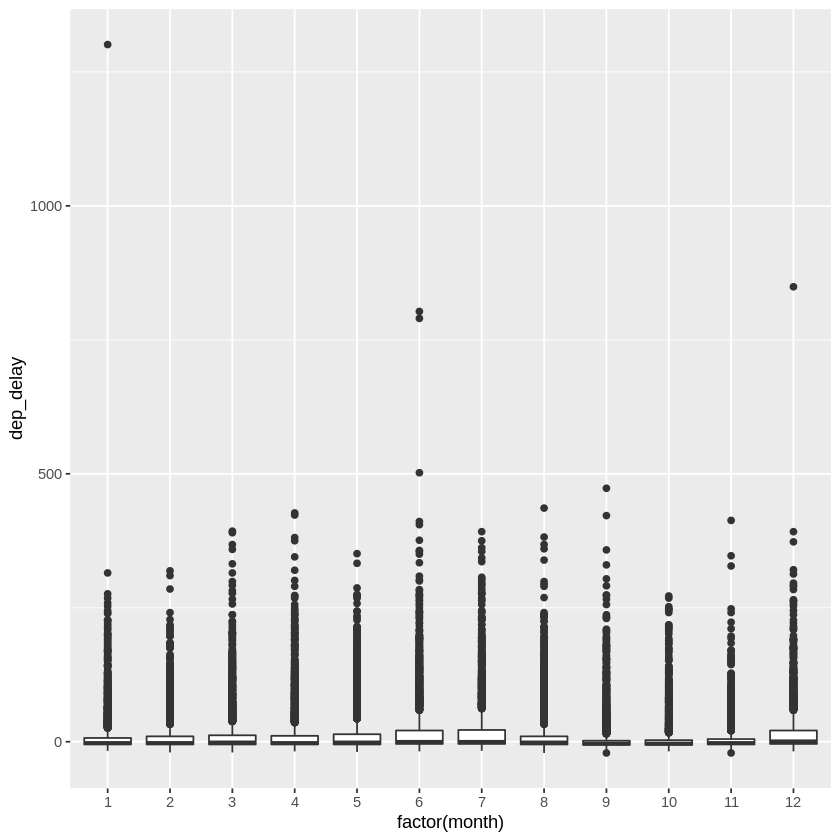

In [23]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

In [30]:
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))

In [31]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))

`summarise()` ungrouping output (override with `.groups` argument)



origin,ot_dep_rate
<chr>,<dbl>
LGA,0.7279229
JFK,0.6935854
EWR,0.6369892


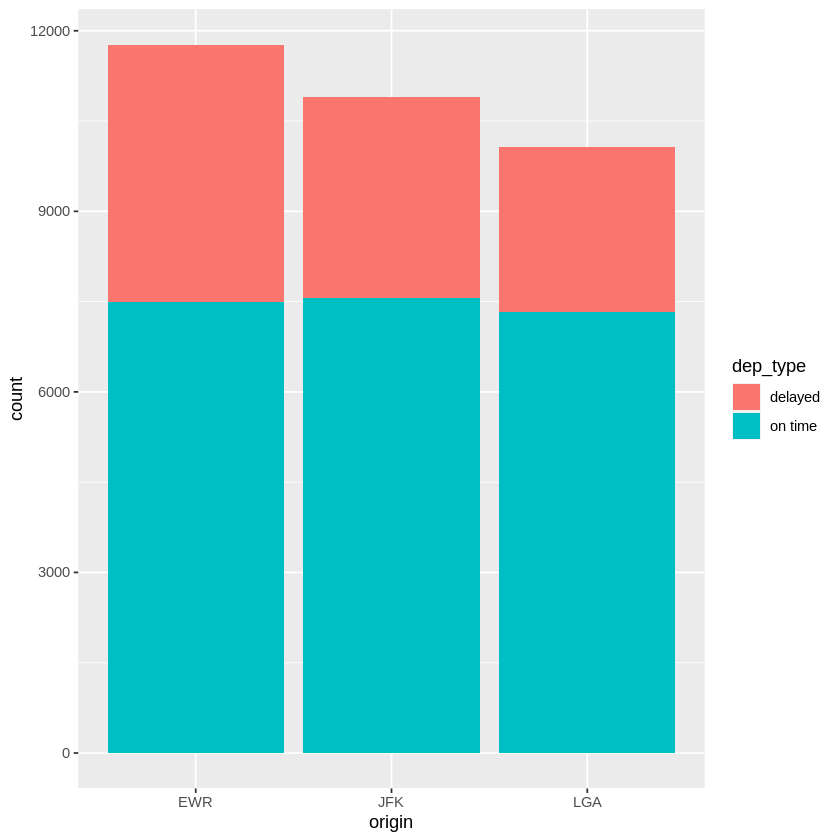

In [37]:
ggplot(data = nycflights, aes(x = origin, fill = dep_type)) +
  geom_bar()